# Mobility Data

In this notebook, we will explore the mobility data. Specifically, there are moving objects (e.g., vehicles and humans) in each DeepVerse scenario. These are attached with a user antenna, and relevant information may be useful in various tasks, such as speed, direction etc. The data of these moving objects is available in the dataset, and we will go into the details next.

We first import the required modules of the library and adjust the parameters.

In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.insert(0, '../src')

import numpy as np

from deepverse import ParameterManager
from deepverse import Dataset

from pprint import pprint

# Path to the MATLAB configuration file
config_path = os.path.join("../params/config.m")

# Initialize ParameterManager and load parameters
param_manager = ParameterManager(config_path)

param_manager.params['dataset_folder'] = r'D:\DeepVerse\scenarios'
param_manager.params['scenario'] = 'Town01-Carla'

# # Print the parameters
print("Loaded Parameters:")
pprint(param_manager.params)

Loaded Parameters:
{'basestations': [1],
 'camera': True,
 'camera_id': [1, 2, 3, 4, 5],
 'comm': {'OFDM': {'bandwidth': 0.05,
                   'selected_subcarriers': [0, 1],
                   'subcarriers': 512},
          'activate_RX_filter': 0,
          'bs_antenna': {'FoV': [360, 180],
                         'rotation': [5, 10, 20],
                         'shape': [32, 1],
                         'spacing': 0.5},
          'enable': True,
          'enable_Doppler': 1,
          'generate_OFDM_channels': 1,
          'num_paths': 25,
          'ue_antenna': {'FoV': [360, 180],
                         'rotation': [0, 30, 0],
                         'shape': [1, 1],
                         'spacing': 0.5}},
 'dataset_folder': 'D:\\DeepVerse\\scenarios',
 'lidar': True,
 'position': True,
 'radar': {'FMCW': {'Fs': 4000000.0,
                    'chirp_slope': 15000000000000.0,
                    'n_chirps': 256,
                    'n_samples_per_chirp': 512},
         

There is only a single relevant parameter: `position` to enable the moving object information. 

Let us now generate the dataset:

In [3]:
dataset = Dataset(param_manager)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.

Scene 1/2

Basestation 1


Generating channels: 100%|██████████| 1/1 [00:04<00:00,  4.82s/it]



Scene 2/2

Basestation 1


Generating channels: 100%|██████████| 1/1 [00:04<00:00,  5.00s/it]



Scene 1/2

Basestation 1

UE-BS Channels


Generating channels: 100%|██████████| 2/2 [00:00<00:00, 999.71it/s]



BS-BS Channels


Generating channels: 100%|██████████| 1/1 [00:00<00:00, 249.97it/s]



Scene 2/2

Basestation 1

UE-BS Channels


Generating channels: 100%|██████████| 2/2 [00:00<00:00, 1000.31it/s]



BS-BS Channels


Generating channels: 100%|██████████| 1/1 [00:00<00:00, 249.91it/s]


### Accessing Mobility Data

Let us now explore the available channel information. Let us list all mobility information.

In [10]:
mobility = dataset.get_sample('mobility')
pprint(mobility)

{0: MovingObject(id=0, num_time_samples=417, time_interval=40,456),
 1: MovingObject(id=1, num_time_samples=312, time_interval=100,411),
 2: MovingObject(id=2, num_time_samples=314, time_interval=250,563),
 3: MovingObject(id=3, num_time_samples=315, time_interval=330,644),
 4: MovingObject(id=4, num_time_samples=315, time_interval=354,668),
 5: MovingObject(id=5, num_time_samples=317, time_interval=420,736),
 6: MovingObject(id=6, num_time_samples=312, time_interval=450,761),
 7: MovingObject(id=7, num_time_samples=423, time_interval=482,904),
 8: MovingObject(id=8, num_time_samples=415, time_interval=500,914),
 9: MovingObject(id=9, num_time_samples=315, time_interval=519,833),
 10: MovingObject(id=10, num_time_samples=334, time_interval=530,863),
 11: MovingObject(id=11, num_time_samples=311, time_interval=538,848),
 12: MovingObject(id=12, num_time_samples=320, time_interval=570,889),
 13: MovingObject(id=13, num_time_samples=331, time_interval=570,900),
 14: MovingObject(id=14, nu

As it can be seen from the output, there are $48$ vehicles in this scenario, each spanning a different range of total $2000$ samples. For example, the first vehicle enters the scene at sample $40$, and exits at sample $456$. Its channel information will be available for $417$ total samples, i.e., $[40, 456]$. Now, let's focus on this vehicle.

In [14]:
mobility = dataset.get_sample('mobility', ue_idx=0)
mobility_information = mobility.get_all_samples()
pprint(mobility_information.keys())

dict_keys(['time', 'location', 'angle', 'speed', 'acceleration', 'bounding_box', 'tx_height', 'slope'])


The function `get_all_samples()` return a dictionary of various properties in the data as a dictionary. These properties in this example are detailed as follows:
- *time*: Time index of the sample
- *location*: 3D cartesian location vector of the vehicle
- *angle*: 1D horizontal rotation angle in the cartesian space
- *speed*: Speed of the vehicle in m/s.
- *acceleration*: Acceleration of the vehicle in m^2/s.
- *bounding_box*: Bounding box corners.
- *tx_height*: Transmitter antenna height at the x-y center provided in the location. The antennas are usually placed at the top of the objects, and they are at a higher height.
- *slope*: Slope of the vehicle. In the case the scenario contains uneven surface, such as a bridge, this information will provide the slope of the vehicle.

Now, let's see the location information.

In [24]:
location = mobility_information['location']
location = np.array(location)
print(location.shape)

(417, 3)


We can also directly access the data at a specific time index with `get_sample` function with

In [33]:
mobility = dataset.get_sample('mobility', ue_idx=0, index=40)
pprint(mobility)

{'acceleration': 0.0,
 'angle': 180.0,
 'bounding_box': array([[3.0585e+02, 4.0700e+00, 2.0000e-01],
       [3.1995e+02, 7.1700e+00, 3.5000e+00]]),
 'location': [312.9, 5.62, 0.25],
 'slope': 0.0,
 'speed': 0.0,
 'time': 40,
 'tx_height': 3.45}


It is a matrix of size (time samples x 3 -x,y,z-). We can plot this data to see the trajectory of the vehicle as follows:

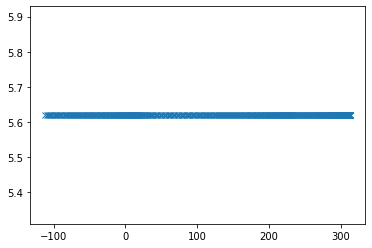

In [27]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(location[:, 0], location[:, 1], 'x')
plt.show()